# Si importano le librerie necessarie ed il file csv

Le domande a cui vogliamo rispondere sono 
1) Quanti giocatori sono mancini? e che ruolo ricoprono?
2) Qual'è l'età media dei giocatori?
3) Qual'è il ruolo che ha più giocatori
4) Qual'è la nazionale con la rosa più quotata?
5) I giocatori più esperti valgono di più?
6) Qual'è la nazione che ha il maggior numero di prospetti?


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# Let's import what we'll need for the analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

players_df=pd.read_csv('Fifa_23_Players_Data.csv')

players_df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [2]:
players_df.info()
#players_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17529 entries, 0 to 17528
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     17529 non-null  object
 1   Full Name                    17529 non-null  object
 2   Overall                      17529 non-null  int64 
 3   Potential                    17529 non-null  int64 
 4   Value(in Euro)               17529 non-null  int64 
 5   Positions Played             17529 non-null  object
 6   Best Position                17529 non-null  object
 7   Nationality                  17529 non-null  object
 8   Image Link                   17529 non-null  object
 9   Age                          17529 non-null  int64 
 10  Height(in cm)                17529 non-null  int64 
 11  Weight(in kg)                17529 non-null  int64 
 12  TotalStats                   17529 non-null  int64 
 13  BaseStats                    17

## Selezioniamo le colonne che ci interessano

In [3]:
#players_df.columns
interesting_colum = ['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 
       'International Reputation', 'National Team Name']

PL_df = players_df[interesting_colum]
PL_df['On Loan'].value_counts()

-       16361
TRUE     1168
Name: On Loan, dtype: int64

In [4]:
# Impostiamo il valore 1 se il giocatore è in nazionale
# Impostiamo il valore 0 se in giocatore non è in nazionale
def in_nation (players):
    nationTeam = players
    if nationTeam !='-':
        return 1
    else:
        return 0

PL_df['in_natTeam'] = PL_df['National Team Name'].apply(in_nation)
PL_df

C:\Users\Vincenzo\AppData\Local\Temp\ipykernel_25680\3692120757.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL_df['in_natTeam'] = PL_df['National Team Name'].apply(in_nation)


,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,International Reputation,National Team Name,in_natTeam
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,...,99900000,RW,2023,30,2021,-,Left,5,Argentina,1
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,...,131199999,CF,2023,9,2009,-,Right,4,France,1
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,...,172200000,ST,2025,9,2022,-,Right,5,Poland,1
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,...,198900000,CM,2025,17,2015,-,Right,4,Belgium,1
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,...,366700000,ST,2024,7,2018,-,Right,4,France,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,...,193000,RES,2022,20,2018,-,Right,1,-,0
17525,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,60,...,158000,SUB,2023,30,2021,-,Right,1,-,0
17526,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,...,332000,SUB,2023,38,2022,-,Right,1,-,0
17527,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,17,178,65,...,218000,SUB,2024,37,2022,-,Right,1,-,0


In [5]:
# Aggiungiamo il potenziale di crescita ogni singolo giocatore
for idx in PL_df.index:
    value = PL_df['Potential'][idx]-PL_df['Overall'][idx]
    PL_df.loc[idx,'delta_pot'] = value
PL_df

C:\Users\Vincenzo\AppData\Local\Temp\ipykernel_25680\1603786141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL_df.loc[idx,'delta_pot'] = value


,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,International Reputation,National Team Name,in_natTeam,delta_pot
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,...,RW,2023,30,2021,-,Left,5,Argentina,1,0.0
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,...,CF,2023,9,2009,-,Right,4,France,1,0.0
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,...,ST,2025,9,2022,-,Right,5,Poland,1,0.0
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,...,CM,2025,17,2015,-,Right,4,Belgium,1,0.0
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,...,ST,2024,7,2018,-,Right,4,France,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,...,RES,2022,20,2018,-,Right,1,-,0,9.0
17525,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,60,...,SUB,2023,30,2021,-,Right,1,-,0,10.0
17526,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,...,SUB,2023,38,2022,-,Right,1,-,0,20.0
17527,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,17,178,65,...,SUB,2024,37,2022,-,Right,1,-,0,14.0


In [21]:
for idx in PL_df.index:
    value = PL_df['Value(in Euro)'][idx]/1000000
    PL_df.loc[idx,'Value (in Milioni di Euro)'] = value
PL_df

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Club Jersey Number,Joined On,On Loan,Preferred Foot,International Reputation,National Team Name,in_natTeam,delta_pot,Value (in Milioni di Euro),year_remain
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,...,30,2021,-,Left,5,Argentina,1,0.0,54.00,1
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,...,9,2009,-,Right,4,France,1,0.0,64.00,1
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,...,9,2022,-,Right,5,Poland,1,0.0,84.00,3
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,...,17,2015,-,Right,4,Belgium,1,0.0,107.50,3
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,...,7,2018,-,Right,4,France,1,4.0,190.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,...,20,2018,-,Right,1,-,0,9.0,0.11,0
17525,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,60,...,30,2021,-,Right,1,-,0,10.0,0.09,1
17526,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,...,38,2022,-,Right,1,-,0,20.0,0.13,1
17527,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,17,178,65,...,37,2022,-,Right,1,-,0,14.0,0.10,2


In [22]:
def year_cal (players):
    nationTeam = int(players)
    return (nationTeam - 2022)

PL_df['year_remain'] = PL_df['Contract Until'].replace('-','2022').apply(year_cal)
PL_df

C:\Users\Vincenzo\AppData\Local\Temp\ipykernel_25680\3258815523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL_df['year_remain'] = PL_df['Contract Until'].replace('-','2022').apply(year_cal)


,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Club Jersey Number,Joined On,On Loan,Preferred Foot,International Reputation,National Team Name,in_natTeam,delta_pot,Value (in Milioni di Euro),year_remain
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,...,30,2021,-,Left,5,Argentina,1,0.0,54.00,1
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,...,9,2009,-,Right,4,France,1,0.0,64.00,1
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,...,9,2022,-,Right,5,Poland,1,0.0,84.00,3
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,...,17,2015,-,Right,4,Belgium,1,0.0,107.50,3
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,...,7,2018,-,Right,4,France,1,4.0,190.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,...,20,2018,-,Right,1,-,0,9.0,0.11,0
17525,Dejiang Yang,47,57,90000,CDM,CDM,China PR,17,175,60,...,30,2021,-,Right,1,-,0,10.0,0.09,1
17526,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,...,38,2022,-,Right,1,-,0,20.0,0.13,1
17527,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,17,178,65,...,37,2022,-,Right,1,-,0,14.0,0.10,2


### Analizziamo alcune caratteristiche dei giocatori presenti

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

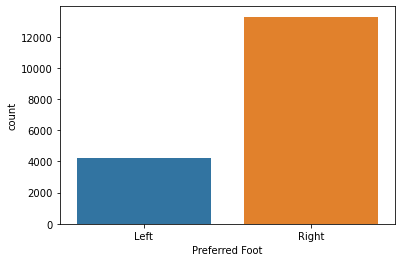

In [8]:
sns.countplot(x='Preferred Foot',data=PL_df)

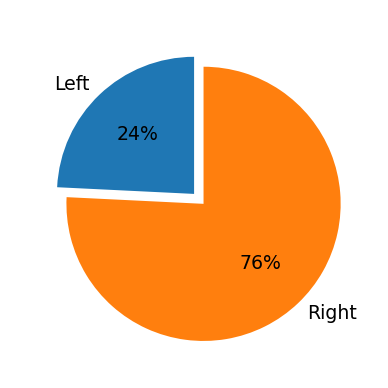

In [9]:
category_names = ['Left','Right']
sizes = [PL_df['Preferred Foot'].value_counts()['Left'],PL_df['Preferred Foot'].value_counts()['Right']]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', explode=[0, 0.1])
plt.show()

<AxesSubplot:xlabel='Best Position', ylabel='count'>

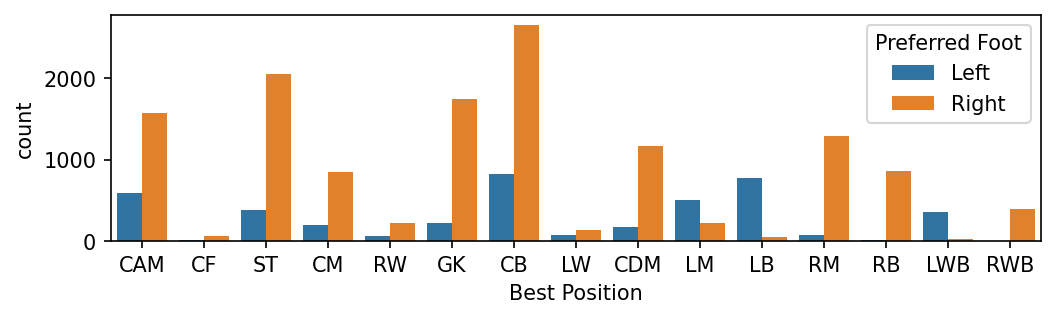

In [10]:
# Per ruolo vediamo quanti sono mancini o meno
plt.figure(figsize=(8, 2), dpi=150)
sns.countplot(x='Best Position', data=PL_df, hue='Preferred Foot')

In [11]:
age_mean = PL_df['Age'].mean()
age_mean = round(age_mean, 2)
print(f'Età media giocatori {age_mean}')

Età media giocatori 25.3


<AxesSubplot:xlabel='Age', ylabel='Preferred Foot'>

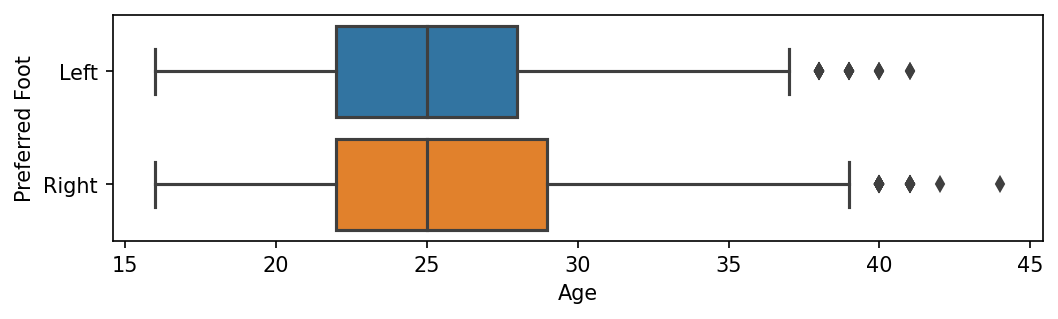

In [12]:
plt.figure(figsize=(8, 2), dpi=150)
sns.boxplot(data=PL_df, x="Age", y="Preferred Foot", order=["Left", "Right"])

### Un occhio alla distribuzione delle caratteristiche principali

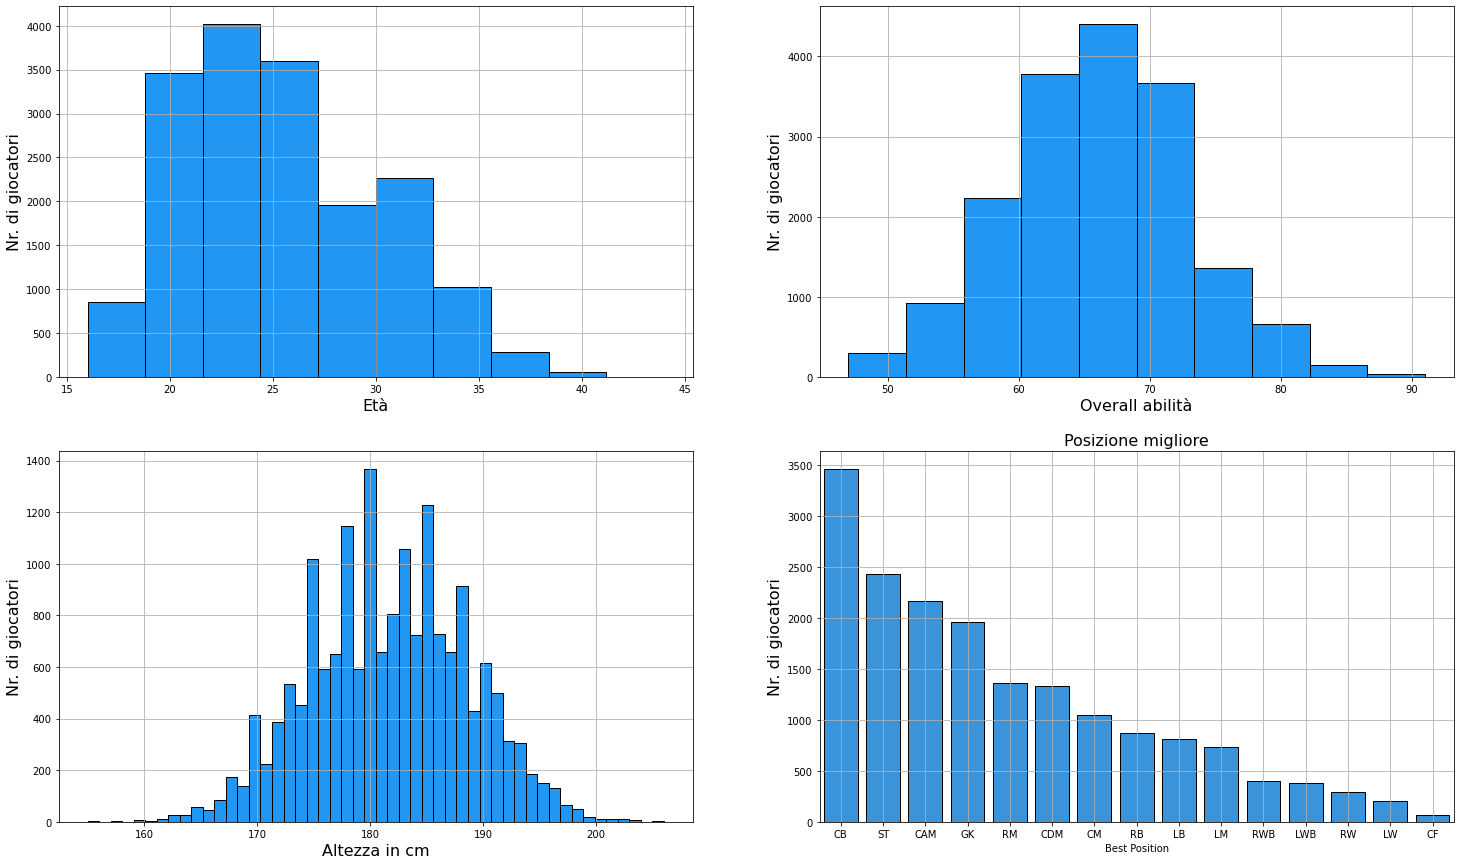

In [13]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
plt.hist(PL_df['Age'],  ec='black', color='#2196f3')
#plt.title('Age hist', fontsize=16)
plt.xlabel('Età', fontsize=16)
plt.ylabel('Nr. di giocatori', fontsize=16)
plt.grid()

plt.subplot(2,2,2)
plt.hist(PL_df['Overall'],  ec='black', color='#2196f3')
#plt.title('Age hist', fontsize=16)
plt.xlabel('Overall abilità', fontsize=16)
plt.ylabel('Nr. di giocatori', fontsize=16)
plt.grid()

plt.subplot(2,2,3)
plt.hist(PL_df['Height(in cm)'],  bins=50,ec='black', color='#2196f3')
#plt.title('Age hist', fontsize=16)
plt.xlabel('Altezza in cm', fontsize=16)
#plt.xlim(0,20)
plt.ylabel('Nr. di giocatori', fontsize=16)
plt.grid()

plt.subplot(2,2,4)
sns.countplot(x='Best Position', data=PL_df, ec='black', color='#2196f3', order=PL_df['Best Position'].value_counts().index)
plt.title('Posizione migliore', fontsize=16)
#plt.xlabel('Posizione migliore', fontsize=16)
plt.ylabel('Nr. di giocatori', fontsize=16)
plt.grid()

plt.show()

## Andiamo a vedere le caratteristiche di ogni nazionale di calcio

In [14]:
Nation_squad = PL_df.groupby(['National Team Name'],as_index=False).sum()
Nation_squad.drop(columns=['Age','BaseStats','Weight(in kg)','Joined On','International Reputation','delta_pot','year_remain','Release Clause','Release Clause','Potential'],inplace=True)
Nation_squad.drop([0], inplace=True)

Nation_squad['Overall'] = round(Nation_squad['Overall']/Nation_squad['in_natTeam'],2)
Nation_squad['Height(in cm)'] = round(Nation_squad['Height(in cm)']/Nation_squad['in_natTeam'],2)
Nation_squad['Mean_Wage(in Euro)'] = round(Nation_squad['Wage(in Euro)']/Nation_squad['in_natTeam'],2)
Nation_squad

,National Team Name,Overall,Value(in Euro),Height(in cm),TotalStats,Wage(in Euro),in_natTeam,Value (in Milioni di Euro),Mean_Wage(in Euro)
1,Argentina,82.14,716900000,178.91,43544,1680000,22,716.900000,76363.64
2,Australia,69.95,47830000,180.95,38456,187000,22,47.830000,8500.00
3,Austria,76.82,292224999,183.45,40613,813000,22,292.224999,36954.55
4,Belgium,81.17,636600000,184.74,44204,2053000,23,636.600000,89260.87
5,Brazil,80.09,475000000,180.22,42640,751000,23,475.000000,32652.17
6,Canada,72.04,142000000,183.09,39470,300000,23,142.000000,13043.48
7,China PR,66.91,20240000,183.43,39288,150000,23,20.240000,6521.74
8,Croatia,78.26,423800000,183.87,43251,1088800,23,423.800000,47339.13
9,Czech Republic,76.09,262699998,183.48,42654,400650,23,262.699998,17419.57
10,Denmark,77.67,303199999,185.57,39728,972000,21,303.199999,46285.71


In [15]:
Nation_squad.sort_values('Value(in Euro)',ascending=False, inplace=True)
Nation_squad

,National Team Name,Overall,Value(in Euro),Height(in cm),TotalStats,Wage(in Euro),in_natTeam,Value (in Milioni di Euro),Mean_Wage(in Euro)
13,France,84.04,1213000000,183.78,45967,2881000,23,1213.000000,125260.87
14,Germany,83.78,1101500000,184.83,45392,2104000,23,1101.500000,91478.26
11,England,83.04,1097000000,183.13,45819,2758000,23,1097.000000,119913.04
26,Portugal,83.00,993900000,182.04,45403,2356000,23,993.900000,102434.78
31,Spain,83.09,965000000,182.70,45308,2386000,23,965.000000,103739.13
18,Italy,82.26,905200000,181.87,44833,1754000,23,905.200000,76260.87
21,Netherlands,81.13,825800000,183.91,44821,1641000,23,825.800000,71347.83
1,Argentina,82.14,716900000,178.91,43544,1680000,22,716.900000,76363.64
4,Belgium,81.17,636600000,184.74,44204,2053000,23,636.600000,89260.87
5,Brazil,80.09,475000000,180.22,42640,751000,23,475.000000,32652.17


### Facciamo un confronto fra il valore economico e quello qualitativo delle migliori 11 nazionali

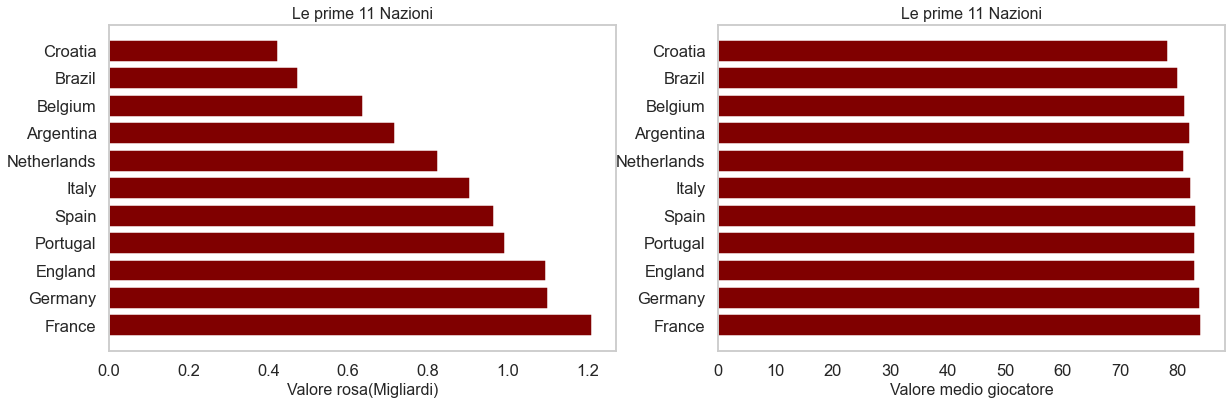

In [23]:
values =  list(Nation_squad['Value(in Euro)']/1000000000)
Nat_squad = list(Nation_squad['National Team Name'])
overall = list(Nation_squad['Overall'])

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.barh(Nat_squad[:11], values[:11], color='maroon')
plt.title('Le prime 11 Nazioni', fontsize=16)
plt.xlabel('Valore rosa(Migliardi)', fontsize=16)
plt.grid()

plt.subplot(1,2,2)
plt.barh(Nat_squad[:11], overall[:11], color='maroon')
plt.title('Le prime 11 Nazioni', fontsize=16)
plt.xlabel('Valore medio giocatore', fontsize=16)
plt.grid()


<Figure size 1080x1080 with 0 Axes>

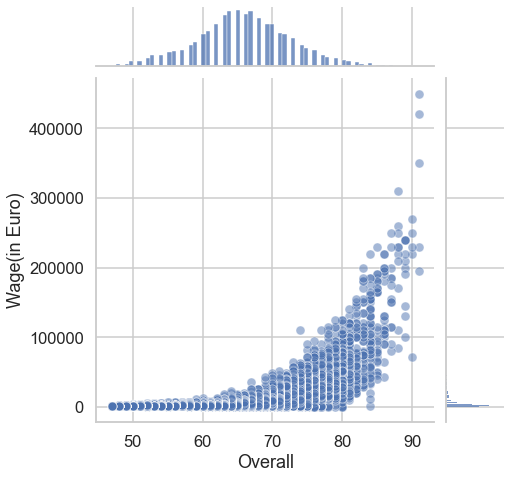

In [17]:
# Analizziamo l'andamento degli stipendi rispetto il valore del giocatore
plt.figure(figsize=(15,15))
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=PL_df['Overall'], y=PL_df['Wage(in Euro)'], height=7, joint_kws={'alpha':0.5})
plt.show()

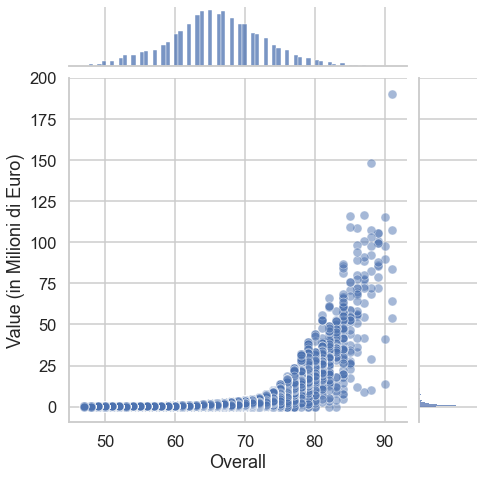

In [18]:
# Analizziamo l'andamento del valore economico rispetto il valore del giocatore
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=PL_df['Overall'], y=PL_df['Value (in Milioni di Euro)'], height=7, joint_kws={'alpha':0.5})
plt.show()

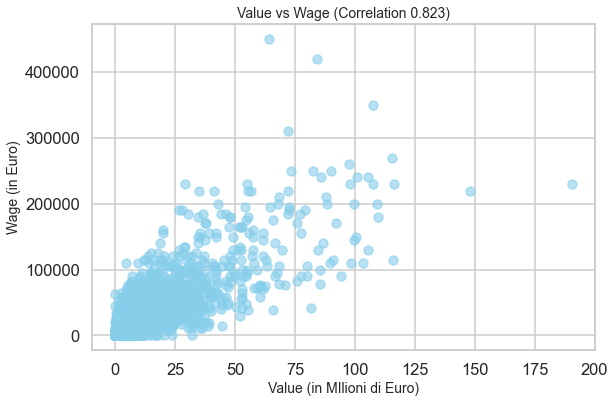

In [39]:
# Vediamo la correlazione fra valore economico del giocatore e il suo stipendio
Val_Wagde_corr = round(PL_df['Value(in Euro)'].corr(PL_df['Wage(in Euro)']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=PL_df['Value (in Milioni di Euro)'], y=PL_df['Wage(in Euro)'], alpha=0.6, s=80, color='skyblue')

plt.title(f'Value vs Wage (Correlation {Val_Wagde_corr})', fontsize=14)
plt.xlabel('Value (in MIlioni di Euro)', fontsize=14)
plt.ylabel('Wage (in Euro)', fontsize=14)
plt.show()

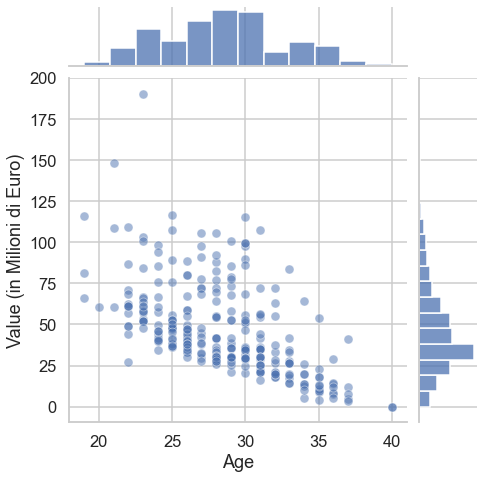

In [36]:
# Analizziamo l'andamento del valore economico rispetto età
# questo per i giocatori più bravi (con overall >81)
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=PL_df.loc[PL_df.Overall > 81, 'Age'], y=PL_df.loc[PL_df.Overall > 81, 'Value (in Milioni di Euro)'], height=7, joint_kws={'alpha':0.5})
plt.show()

## Andiamo a vedere le giovani leve

In [72]:
giovani = PL_df.loc[PL_df.Age<23]
giovani = giovani.loc[giovani.Potential>82]
giovani = giovani.loc[giovani.delta_pot>10]
giovani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 526 to 14622
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Full Name                   154 non-null    object 
 1   Overall                     154 non-null    int64  
 2   Potential                   154 non-null    int64  
 3   Value(in Euro)              154 non-null    int64  
 4   Positions Played            154 non-null    object 
 5   Best Position               154 non-null    object 
 6   Nationality                 154 non-null    object 
 7   Age                         154 non-null    int64  
 8   Height(in cm)               154 non-null    int64  
 9   Weight(in kg)               154 non-null    int64  
 10  TotalStats                  154 non-null    int64  
 11  BaseStats                   154 non-null    int64  
 12  Club Name                   154 non-null    object 
 13  Wage(in Euro)               154

In [73]:
giovani

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Club Jersey Number,Joined On,On Loan,Preferred Foot,International Reputation,National Team Name,in_natTeam,delta_pot,Value (in Milioni di Euro),year_remain
526,Anssumane Fati,79,90,38000000,LW,CAM,Spain,19,178,66,...,10,2018,-,Right,2,-,0,11.0,38.000,5
1289,Thiago Almada,76,87,17000000,"CAM,LW,RW",CAM,Argentina,21,171,62,...,8,2022,-,Right,1,-,0,11.0,17.000,3
1295,Khvicha Kvaratskhelia,76,88,18500000,"LW,CAM",CAM,Georgia,21,183,70,...,77,2022,-,Right,1,-,0,12.0,18.500,5
1437,Karim Adeyemi,75,87,13500000,ST,ST,Germany,20,177,75,...,27,2022,-,Left,1,-,0,12.0,13.500,5
1563,Alberto Moleiro González,75,90,13000000,"LM,CM,CAM",CAM,Spain,18,169,67,...,10,2021,-,Right,1,-,0,15.0,13.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14322,Alfie Devine,60,83,775000,"CAM,LW",ST,England,17,180,75,...,45,2021,-,Right,1,-,0,23.0,0.775,2
14481,Guillaume Restes,60,83,700000,GK,GK,France,17,186,82,...,50,2021,-,Left,1,-,0,23.0,0.700,2
14482,Laurin Ulrich,60,83,775000,"CM,CAM,LM",CAM,Germany,17,180,76,...,36,2022,-,Right,1,-,0,23.0,0.775,4
14522,Fabio Chiarodia,60,83,725000,CB,CB,Italy,17,186,78,...,39,2021,-,Left,1,-,0,23.0,0.725,3


<AxesSubplot:xlabel='count', ylabel='Nationality'>

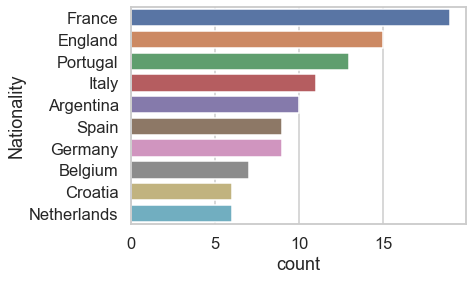

In [74]:
sns.countplot(y='Nationality',data=giovani, order=giovani.Nationality.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='delta_pot'>

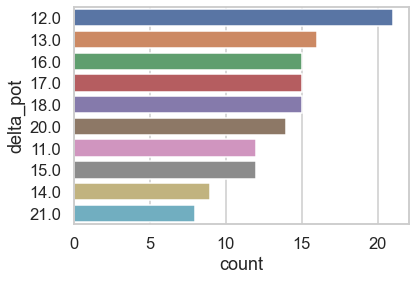

In [75]:
# Possibili acquisti con alta prospettiva
sns.countplot(y='delta_pot',data=giovani, order=giovani.delta_pot.value_counts().iloc[:10].index)

In [99]:
# Prospetti da far crescere
Pl_prospetti = giovani.drop(columns=['Contract Until','Club Position','BaseStats','International Reputation','TotalStats','National Team Name','Joined On','Club Jersey Number','in_natTeam','National Team Name','Weight(in kg)'])
Pl_prospetti = Pl_prospetti.loc[giovani.delta_pot>17]
Pl_prospetti

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Club Name,Wage(in Euro),Release Clause,On Loan,Preferred Foot,delta_pot,Value (in Milioni di Euro),year_remain
5257,Alex Scott,69,87,3500000,"CAM,CM,RM",CAM,England,18,178,Bristol City,6000,8800000,-,Right,18.0,3.500,3
5438,Youssoufa Moukoko,69,88,3500000,ST,ST,Germany,17,175,Borussia Dortmund,4000,8100000,-,Left,19.0,3.500,1
6645,Antonio Nusa,68,88,3300000,"LW,RW,ST",LW,Norway,17,180,Club Brugge KV,2000,7900000,-,Right,20.0,3.300,3
6972,Luca Oyen,67,85,2600000,"LW,CAM",RM,Belgium,19,174,KRC Genk,4000,5500000,-,Right,18.0,2.600,2
6997,Jamie Bynoe-Gittens,67,87,2800000,"LM,RM",RM,England,17,175,Borussia Dortmund,2000,7600000,-,Right,20.0,2.800,3
7528,Rodrigo Martins Gomes,67,85,2600000,"LM,RW",CAM,Portugal,18,175,SC Braga,2000,6800000,-,Right,18.0,2.600,4
7574,Diego Manuel J. da Silva Moreira,67,85,2500000,LW,LM,Portugal,17,179,SL Benfica,950,6600000,-,Left,18.0,2.500,2
7721,Abdul Fatawu Issahaku,67,86,2600000,"CAM,RW",CAM,Ghana,18,177,Sporting CP,2000,6800000,-,Left,19.0,2.600,5
7749,Cole Palmer,67,85,2700000,"RW,CAM,CF",CAM,England,20,189,Manchester City,26000,6700000,-,Left,18.0,2.700,4
7850,Naci Ünüvar,67,85,2600000,"LW,CAM",CAM,Netherlands,19,168,Trabzonspor,4000,0,TRUE,Right,18.0,2.600,1


<AxesSubplot:xlabel='Best Position', ylabel='count'>

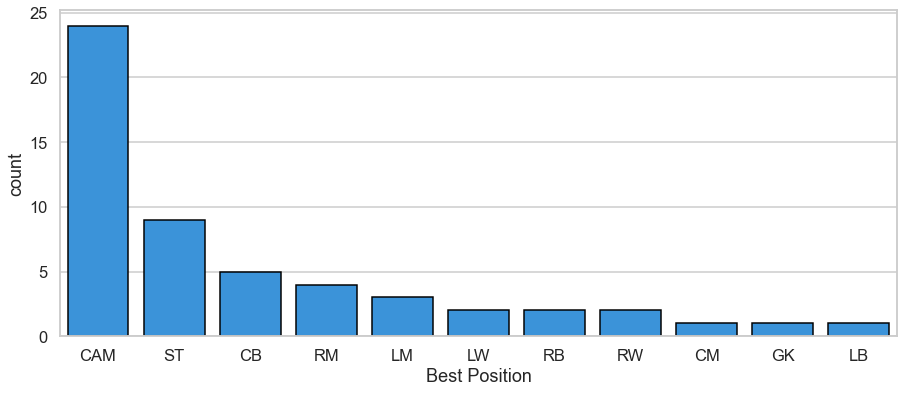

In [100]:
plt.figure(figsize=(15,6))
sns.countplot(x='Best Position', data=Pl_prospetti, ec='black', color='#2196f3', order=Pl_prospetti['Best Position'].value_counts().index)

In [103]:
pot_mean = Pl_prospetti['Potential'].mean()
pot_mean = round(pot_mean, 2)
print(f'Il potenziale medio dei giocatori è {pot_mean}')

ovl_mean = Pl_prospetti['Overall'].mean()
ovl_mean = round(ovl_mean, 2)
print(f'La qulità media dei giocatori è {ovl_mean}')

Il potenziale medio dei giocatori è 84.22
La qulità media dei giocatori è 64.28
